# Pandas Basics
Some parts of this notebook were adopted from Priciples and Techniques of Data Science Course Presented at UC Berkeley

In [1]:
import pandas as pd


There are Three core objects in pandas: the DataFrame, the Series and the indexes.
## DataFrames, Series and Indices
Data Frame: 2D data tabular data.
Series: 1D data. I usually think of it as columnar data.
Index: A sequence of row labels.
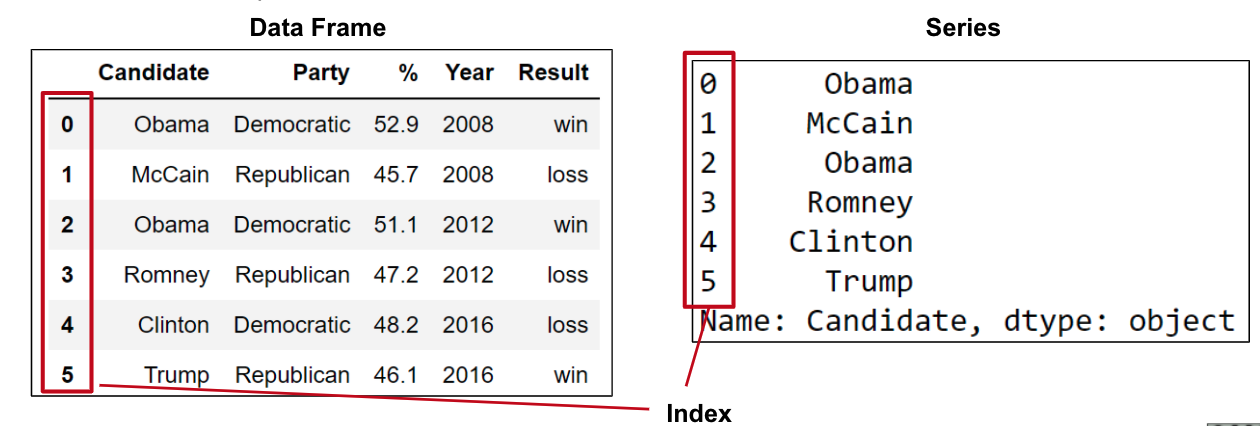

In [1]:
pd.DataFrame({'Tehran': ['sunny', 'Hazy'], 'Shiraz': ['Partly Sunny', 'Cloudy'], 'Ahwaz': ['Sunshine', 'Sunny']})

NameError: name 'pd' is not defined

The syntax for declaring a new DataFrame is a dictionary whose keys are the column names (Tehran and Shiraz and Ahwaz in this example), and whose values are a list of entries.
to assign values to column labels we can use the below overload:

In [5]:
pd.DataFrame({'Tehran': ['Rainy', 'Hazy'], 'Shiraz': ['Partly Sunny', 'Cloudy'], 'Ahwaz': ['Sunshine', 'Sunny']},index = ['99/08/05','99/08/06'])

,Tehran,Shiraz,Ahwaz
99/08/05,Rainy,Partly Sunny,Sunshine
99/08/06,Hazy,Cloudy,Sunny


### Series
A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list. And in fact you can create one with nothing more than a list:

In [6]:
pd.Series(['Tehran', 'Shiraz', 'Ahwaz'])

0    Tehran
1    Shiraz
2     Ahwaz
dtype: object

## Index
Index: A sequence of row labels.
We can think of a Data Frame as a collection of Series that all share the same Index.
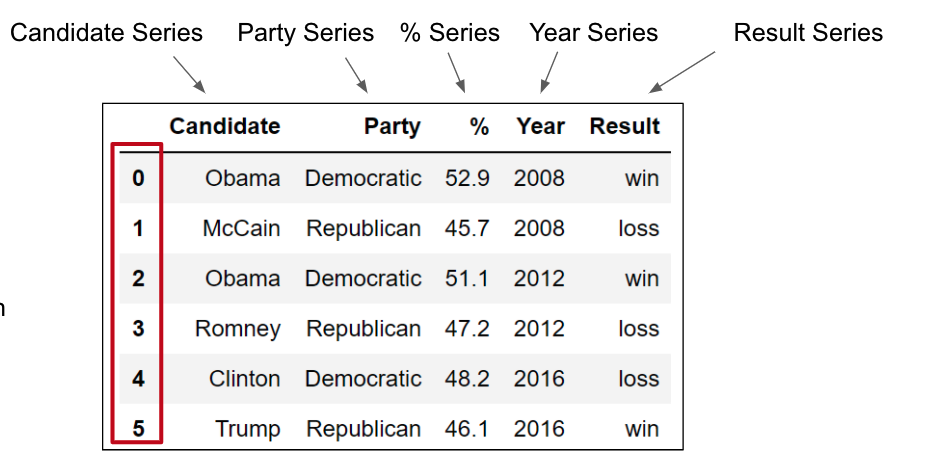


<h2 id="Reading-in-DataFrames-from-Files">Reading in DataFrames from Files<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec05/lec05.html#Reading-in-DataFrames-from-Files">¶</a></h2>


## Reading Data Files
Most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.
<p align="center">
   <img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg"/>
</p>

Pandas has a number of very useful file reading tools. You can see them enumerated by typing "pd.re" and pressing tab. We'll be using read_csv today.

In [19]:

elections = pd.read_csv("elections.csv")
elections # if we end a cell with an expression or variable name, the result will print


,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
9,Perot,Independent,18.9,1992,loss



<p>We can use the head command to return only a few rows of a dataframe.</p>


In [10]:

elections.head(7)



,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss



<p>There is also a tail command.</p>


In [12]:

elections.tail(20).head(5)


,Candidate,Party,%,Year,Result
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win



<p>The read_csv command lets us specify a column to use an index. For example, we could have used Year as the index.</p>


In [13]:

elections_year_index = pd.read_csv("elections.csv", index_col = "Year")
elections_year_index.head(5)



,Candidate,Party,%,Result
Year,,,,
1980,Reagan,Republican,50.7,win
1980,Carter,Democratic,41.0,loss
1980,Anderson,Independent,6.6,loss
1984,Reagan,Republican,58.8,win
1984,Mondale,Democratic,37.6,loss



<p>Alternately, we could have used the set_index commmand.</p>


In [20]:

elections_party_index = elections.set_index("Party")
elections_party_index.head(5)



,Candidate,%,Year,Result
Party,,,,
Republican,Reagan,50.7,1980,win
Democratic,Carter,41.0,1980,loss
Independent,Anderson,6.6,1980,loss
Republican,Reagan,58.8,1984,win
Democratic,Mondale,37.6,1984,loss



<p>The set_index command (along with all other data frame methods) does not modify the dataframe. That is, the original "elections" is untouched. Note: There is a flag called "inplace" which does modify the calling dataframe.</p>


In [18]:
elections.head() #the index remains unchanged

,Candidate,%,Year,Result
Party,,,,
Republican,Reagan,50.7,1980,win
Democratic,Carter,41.0,1980,loss
Independent,Anderson,6.6,1980,loss
Republican,Reagan,58.8,1984,win
Democratic,Mondale,37.6,1984,loss



<p>By contrast, column names are ideally unique. For example, if we try to read in a file for which column names are not unique, Pandas will automatically rename any duplicates.</p>


In [21]:

dups = pd.read_csv("elections-duplicate.csv")
dups



,Candidate,Party,Party.1,%,Year,Result
0,Reagan,Republican,Republican,50.7,1980,win
1,Carter,Democratic,Democratic,41.0,1980,loss
2,Anderson,Independent,Independent,6.6,1980,loss
3,Reagan,Republican,Republican,58.8,1984,win
4,Mondale,Democratic,Democratic,37.6,1984,loss
5,Bush,Republican,Republican,53.4,1988,win
6,Dukakis,Democratic,Democratic,45.6,1988,loss
7,Clinton,Democratic,Democratic,43.0,1992,win
8,Bush,Republican,Republican,37.4,1992,loss
9,Perot,Independent,Independent,18.9,1992,loss



<h2 id="The-[]-Operator">The [] Operator<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec05/lec05.html#The-[]-Operator">¶</a></h2>



<p>The DataFrame class has an indexing operator [] that lets you do a variety of different things. If your provide a String to the [] operator, you get back a Series corresponding to the requested label.</p>


In [22]:

elections_year_index.head(6)



,Candidate,Party,%,Result
Year,,,,
1980,Reagan,Republican,50.7,win
1980,Carter,Democratic,41.0,loss
1980,Anderson,Independent,6.6,loss
1984,Reagan,Republican,58.8,win
1984,Mondale,Democratic,37.6,loss
1988,Bush,Republican,53.4,win


In [23]:

elections_year_index["Candidate"].head(6)



Year
1980      Reagan
1980      Carter
1980    Anderson
1984      Reagan
1984     Mondale
1988        Bush
Name: Candidate, dtype: object


<p>The [] operator also accepts a list of strings. In this case, you get back a DataFrame corresponding to the requested strings.</p>


In [24]:

elections_year_index[["Candidate", "Party"]].head(6)



,Candidate,Party
Year,,
1980,Reagan,Republican
1980,Carter,Democratic
1980,Anderson,Independent
1984,Reagan,Republican
1984,Mondale,Democratic
1988,Bush,Republican



<p>A list of one label also returns a DataFrame. This can be handy if you want your results as a DataFrame, not a series.</p>


In [25]:

elections_year_index[["Candidate"]].head(6)



,Candidate
Year,
1980,Reagan
1980,Carter
1980,Anderson
1984,Reagan
1984,Mondale
1988,Bush



<p>Note that we can also use the to_frame method to turn a Series into a DataFrame.</p>


In [26]:

elections_year_index["Candidate"].to_frame().head(5)



,Candidate
Year,
1980,Reagan
1980,Carter
1980,Anderson
1984,Reagan
1984,Mondale



<p>The [] operator also accepts numerical slices as arguments. In this case, we are indexing by row, not column!</p>


In [27]:

elections_year_index[0:4]



,Candidate,Party,%,Result
Year,,,,
1980,Reagan,Republican,50.7,win
1980,Carter,Democratic,41.0,loss
1980,Anderson,Independent,6.6,loss
1984,Reagan,Republican,58.8,win



<p>If you provide a single argument to the [] operator, it tries to use it as a name. This is true even if the argument passed to [] is an integer.</p>


In [28]:

# elections_year_index[0] #this does not work, try uncommenting this to see it fail in action, woo



KeyError: 0


<p>The following cells allow you to test your understanding.</p>


In [29]:

weird = pd.DataFrame({
    1:["topdog","botdog"], 
    "1":["topcat","botcat"]
})
weird



,1,1
0,topdog,topcat
1,botdog,botcat


In [30]:

weird[1] #try to predict the output



0    topdog
1    botdog
Name: 1, dtype: object

In [31]:

weird["1"] #try to predict the output



0    topcat
1    botcat
Name: 1, dtype: object

In [32]:

weird[1:] #try to predict the output



,1,1
1,botdog,botcat



<h2 id="Boolean-Array-Selection">Boolean Array Selection<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec05/lec05.html#Boolean-Array-Selection">¶</a></h2>



<p>The <code>[]</code> operator also supports array of booleans as an input. In this case, the array must be exactly as long as the number of rows. The result is a filtered version of the data frame, where only rows corresponding to True appear.</p>


In [33]:

elections_year_index[[False, False, False, False, False, 
          False, False, True, False, False,
          True, False, False, False, True,
          False, False, False, False, False,
          False, False, True]]



,Candidate,Party,%,Result
Year,,,,
1992,Clinton,Democratic,43.0,win
1996,Clinton,Democratic,49.2,win
2000,Bush,Republican,47.9,win
2016,Trump,Republican,46.1,win



<p>One very common task in Data Science is filtering. Boolean Array Selection is one way to achieve this in Pandas. We start by observing logical operators like the equality operator can be applied to Pandas Series data to generate a Boolean Array. For example, we can compare the 'Result' column to the String 'win':</p>


In [34]:

elections_year_index.head(5)



,Candidate,Party,%,Result
Year,,,,
1980,Reagan,Republican,50.7,win
1980,Carter,Democratic,41.0,loss
1980,Anderson,Independent,6.6,loss
1984,Reagan,Republican,58.8,win
1984,Mondale,Democratic,37.6,loss


In [35]:

iswin = elections_year_index['Result'] == 'win'
iswin#.head(5)



Year
1980     True
1980    False
1980    False
1984     True
1984    False
1988     True
1988    False
1992     True
1992    False
1992    False
1996     True
1996    False
1996    False
2000    False
2000     True
2004    False
2004     True
2008     True
2008    False
2012     True
2012    False
2016    False
2016     True
Name: Result, dtype: bool


<p>The output of the logical operator applied to the Series is another Series with the same name and index, but of datatype boolean. The entry at row #i represents the result of the application of that operator to the entry of the original Series at row #i.</p>



<p>Such a boolean Series can be used as an argument to the [] operator. For example, the following code creates a DataFrame of all election winners since 1980.</p>


In [36]:

elections_year_index[iswin]



,Candidate,Party,%,Result
Year,,,,
1980,Reagan,Republican,50.7,win
1984,Reagan,Republican,58.8,win
1988,Bush,Republican,53.4,win
1992,Clinton,Democratic,43.0,win
1996,Clinton,Democratic,49.2,win
2000,Bush,Republican,47.9,win
2004,Bush,Republican,50.7,win
2008,Obama,Democratic,52.9,win
2012,Obama,Democratic,51.1,win



<p>Above, we've assigned the result of the logical operator to a new variable called <code>iswin</code>. This is uncommon. Usually, the series is created and used on the same line. Such code is a little tricky to read at first, but you'll get used to it quickly.</p>


In [37]:

elections_year_index[elections_year_index['Result'] == 'win']



,Candidate,Party,%,Result
Year,,,,
1980,Reagan,Republican,50.7,win
1984,Reagan,Republican,58.8,win
1988,Bush,Republican,53.4,win
1992,Clinton,Democratic,43.0,win
1996,Clinton,Democratic,49.2,win
2000,Bush,Republican,47.9,win
2004,Bush,Republican,50.7,win
2008,Obama,Democratic,52.9,win
2012,Obama,Democratic,51.1,win



<p>We can select multiple criteria by creating multiple boolean Series and combining them using the <code>&amp;</code> operator.</p>


In [38]:

win50plus = (elections_year_index['Result'] == 'win') & (elections_year_index['%'] < 50)



In [40]:

win50plus.head(15)



Year
1980    False
1980    False
1980    False
1984    False
1984    False
1988    False
1988    False
1992     True
1992    False
1992    False
1996     True
1996    False
1996    False
2000    False
2000     True
dtype: bool

In [41]:

elections_year_index[(elections_year_index['Result'] == 'win')
          & (elections_year_index['%'] < 50)]

# Note for Python experts: The reason we use the & symbol and not the word "and" is because the Python __and__ 
# method overrides the "&" operator, not the "and" operator.



,Candidate,Party,%,Result
Year,,,,
1992,Clinton,Democratic,43.0,win
1996,Clinton,Democratic,49.2,win
2000,Bush,Republican,47.9,win
2016,Trump,Republican,46.1,win



<p>The | operator is the symbol for or.</p>


In [44]:

elections_year_index[(elections_year_index['Party'] == 'Republican')
          | (elections_year_index['Party'] == "Democratic")]



,Candidate,Party,%,Result
Year,,,,
1980,Reagan,Republican,50.7,win
1980,Carter,Democratic,41.0,loss
1984,Reagan,Republican,58.8,win
1984,Mondale,Democratic,37.6,loss
1988,Bush,Republican,53.4,win
1988,Dukakis,Democratic,45.6,loss
1992,Clinton,Democratic,43.0,win
1992,Bush,Republican,37.4,loss
1996,Clinton,Democratic,49.2,win



<p>If we have multiple conditions (say Republican or Democratic), we can use the isin operator to simplify our code.</p>


In [45]:

elections_year_index['Party'].isin(["Republican", "Democratic"])



Year
1980     True
1980     True
1980    False
1984     True
1984     True
1988     True
1988     True
1992     True
1992     True
1992    False
1996     True
1996     True
1996    False
2000     True
2000     True
2004     True
2004     True
2008     True
2008     True
2012     True
2012     True
2016     True
2016     True
Name: Party, dtype: bool

In [46]:

elections_year_index[elections_year_index['Party'].isin(["Republican", "Democratic"])]



,Candidate,Party,%,Result
Year,,,,
1980,Reagan,Republican,50.7,win
1980,Carter,Democratic,41.0,loss
1984,Reagan,Republican,58.8,win
1984,Mondale,Democratic,37.6,loss
1988,Bush,Republican,53.4,win
1988,Dukakis,Democratic,45.6,loss
1992,Clinton,Democratic,43.0,win
1992,Bush,Republican,37.4,loss
1996,Clinton,Democratic,49.2,win



<p>An alternate simpler way to get back a specific set of rows is to use the <code>query</code> command.</p>


In [47]:

elections_year_index.query("Result == 'win' and Year < 2000")



,Candidate,Party,%,Result
Year,,,,
1980,Reagan,Republican,50.7,win
1984,Reagan,Republican,58.8,win
1988,Bush,Republican,53.4,win
1992,Clinton,Democratic,43.0,win
1996,Clinton,Democratic,49.2,win



<h2 id="loc-and-iloc">loc and iloc<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec05/lec05.html#loc-and-iloc">¶</a></h2>


In [48]:

elections.head(5)



,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss


In [49]:

elections.loc[[0, 1, 2, 3, 4], ['Candidate','Party', 'Year']]



,Candidate,Party,Year
0,Reagan,Republican,1980
1,Carter,Democratic,1980
2,Anderson,Independent,1980
3,Reagan,Republican,1984
4,Mondale,Democratic,1984



<p>Note: The <code>loc</code> command won't work with numeric arguments if we're using the elections DataFrame that was indexed by year.</p>


In [50]:

elections_year_index.head(5)


,Candidate,Party,%,Result
Year,,,,
1980,Reagan,Republican,50.7,win
1980,Carter,Democratic,41.0,loss
1980,Anderson,Independent,6.6,loss
1984,Reagan,Republican,58.8,win
1984,Mondale,Democratic,37.6,loss


In [52]:

#causes error
# elections_year_index.loc[[0, 1, 2, 3, 4], ['Candidate','Party']]#



In [54]:

elections_year_index.loc[[1980, 1984],]



,Candidate,Party,%,Result
Year,,,,
1980,Reagan,Republican,50.7,win
1980,Carter,Democratic,41.0,loss
1980,Anderson,Independent,6.6,loss
1984,Reagan,Republican,58.8,win
1984,Mondale,Democratic,37.6,loss



<p>Loc also supports slicing (for all types, including numeric and string labels!). Note that the slicing for loc is <strong>inclusive</strong>, even for numeric slices.</p>


In [66]:
elections.loc[0:4, 'Candidate':'%']



,Candidate,Party,%
0,Reagan,Republican,50.7
1,Carter,Democratic,41.0
2,Anderson,Independent,6.6
3,Reagan,Republican,58.8
4,Mondale,Democratic,37.6


In [65]:

elections_year_index.loc[1980:1984, 'Candidate':'Party']



,Candidate,Party
Year,,
1980,Reagan,Republican
1980,Carter,Democratic
1980,Anderson,Independent
1984,Reagan,Republican
1984,Mondale,Democratic



<p>If we provide only a single label for the column argument, we get back a Series.</p>


In [67]:

elections.loc[0:4, 'Candidate']



0      Reagan
1      Carter
2    Anderson
3      Reagan
4     Mondale
Name: Candidate, dtype: object


<p>If we want a data frame instead and don't want to use to_frame, we can provde a list containing the column name.</p>


In [68]:

elections.loc[0:4, ['Candidate']]



,Candidate
0,Reagan
1,Carter
2,Anderson
3,Reagan
4,Mondale



<p>If we give only one row but many column labels, we'll get back a Series corresponding to a row of the table. This new Series has a neat index, where each entry is the name of the column that the data came from.</p>


In [69]:

elections.head(1)



,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win


In [70]:

elections.loc[0, 'Candidate':'Year']



Candidate        Reagan
Party        Republican
%                  50.7
Year               1980
Name: 0, dtype: object

In [71]:

elections.loc[[0], 'Candidate':'Year']



,Candidate,Party,%,Year
0,Reagan,Republican,50.7,1980



<p>If we omit the column argument altogether, the default behavior is to retrieve all columns.</p>


In [72]:

elections.loc[[2, 4, 5]]



,Candidate,Party,%,Year,Result
2,Anderson,Independent,6.6,1980,loss
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win



<p>Loc also supports boolean array inputs instead of labels. If the arrays are too short, loc assumes the missing values are False. <strong>Note: For newer versions of Pandas, loc will not assume that the missing values are False and instead throw an error.</strong></p>


In [74]:

elections.loc[[True, False, False, True], [True, False, False, True]]



In [75]:

elections.loc[[0, 3], ['Candidate', 'Year']]



,Candidate,Year
0,Reagan,1980
3,Reagan,1984



<p>We can use boolean array arguments for one axis of the data, and labels for the other.</p>


In [77]:

elections.loc[[True, False, False, True], 'Candidate':'%']




<p>A student asks what happens if you give scalar arguments for the requested rows AND columns. The answer is that you get back just a single value.</p>


In [78]:

elections.loc[0, 'Candidate']



'Reagan'


<h3 id="iloc">iloc<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec05/lec05.html#iloc">¶</a></h3>



<p>loc's cousin iloc is very similar, but is used to access based on numerical position instead of label. For example, to access to the top 3 rows and top 3 columns of a table, we can use [0:3, 0:3]. iloc slicing is <strong>exclusive</strong>, just like standard Python slicing of numerical values.</p>


In [79]:

elections.head(5)



,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss


In [80]:

elections.iloc[0:3, 0:3]



,Candidate,Party,%
0,Reagan,Republican,50.7
1,Carter,Democratic,41.0
2,Anderson,Independent,6.6


In [ ]:

mottos = pd.read_csv('mottos.csv')



In [ ]:

mottos.iloc[0:3, 0:3]




<p>We will use both loc and iloc in the course. Loc is generally preferred for a number of reasons, for example:</p>
<ol>
<li>It is harder to make mistakes since you have to literally write out what you want to get.</li>
<li>Code is easier to read, because the reader doesn't have to know e.g. what column #31 represents.</li>
<li>It is robust against permutations of the data, e.g. the social security administration switches the order of two columns.</li>
</ol>
<p>However, iloc is sometimes more convenient. We'll provide examples of when iloc is the superior choice.</p>



<h2 id="Quick-Challenge">Quick Challenge<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec05/lec05.html#Quick-Challenge">¶</a></h2>



<p>Which of the following expressions return DataFrame of the first 3 Candidate and Party names for candidates that won with more than 50% of the vote.</p>


In [83]:
elections

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss
3,Reagan,Republican,58.8,1984,win
4,Mondale,Democratic,37.6,1984,loss
5,Bush,Republican,53.4,1988,win
6,Dukakis,Democratic,45.6,1988,loss
7,Clinton,Democratic,43.0,1992,win
8,Bush,Republican,37.4,1992,loss
9,Perot,Independent,18.9,1992,loss


In [84]:

elections.iloc[[0, 3, 5], [0, 3]]



,Candidate,Year
0,Reagan,1980
3,Reagan,1984
5,Bush,1988


In [85]:

elections.loc[[0, 3, 5], "Candidate":"Year"]



,Candidate,Party,%,Year
0,Reagan,Republican,50.7,1980
3,Reagan,Republican,58.8,1984
5,Bush,Republican,53.4,1988


In [86]:

elections.loc[elections["%"] > 50, ["Candidate", "Year"]].head(3)



,Candidate,Year
0,Reagan,1980
3,Reagan,1984
5,Bush,1988


In [89]:

elections.loc[elections["%"] > 50, ["Candidate", "Year"]].iloc[0:3, :]



,Candidate,Year
0,Reagan,1980
3,Reagan,1984
5,Bush,1988



<h2 id="Sampling">Sampling<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec05/lec05.html#Sampling">¶</a></h2>



<p>Pandas dataframes also make it easy to get a sample. We simply use the <code>sample</code> method and provide the number of samples that we'd like as the arugment. Sampling is done without replacement by default. Set <code>replace=True</code> if you want replacement.</p>


In [ ]:

elections.sample(10)



In [ ]:

elections.query("Year < 1992").sample(50, replace=True)




<h2 id="Handy-Properties-and-Utility-Functions-for-Series-and-DataFrames">Handy Properties and Utility Functions for Series and DataFrames<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec05/lec05.html#Handy-Properties-and-Utility-Functions-for-Series-and-DataFrames">¶</a></h2>



<h4 id="Python-Operations-on-Numerical-DataFrames-and-Series">Python Operations on Numerical DataFrames and Series<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec05/lec05.html#Python-Operations-on-Numerical-DataFrames-and-Series">¶</a></h4>



<p>Consider a series of only the vote percentages of election winners.</p>


In [ ]:

winners = elections.query("Result == 'win'")["%"]
winners




<p>We can perform various Python operations (including numpy operations) to DataFrames and Series.</p>


In [ ]:

max(winners)



In [ ]:

np.mean(winners)




<p>We can also apply mathematical operations to a DataFrame so long as it has only numerical data.</p>


In [ ]:

(elections[["%", "Year"]] + 3).head(5)




<h4 id="Handy-Utility-Methods">Handy Utility Methods<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec05/lec05.html#Handy-Utility-Methods">¶</a></h4>



<p>The head, shape, size, and describe methods can be used to quickly get a good sense of the data we're working with. For example:</p>


In [ ]:

elections.head(20)



In [ ]:

elections.size




<p>The fact that the size is 115 means our data file is relatively small, with only 115 total entries.</p>


In [ ]:

elections.shape



In [ ]:

elections.describe()




<p>Above, we see a quick summary of all the data.</p>



<p>We can get a direct reference to the index using .index.</p>


In [ ]:

elections_party_index.index




<p>We can also access individual properties of the index, for example, <code>elections_year_index.index.name</code>.</p>


In [ ]:

elections_year_index.index.name




<p>It turns out the columns also have an Index. We can access this index by using <code>.columns</code>.</p>


In [ ]:

elections.columns




<p>There are also a ton of useful utility methods we can use with Data Frames and Series. For example, we can create a copy of a data frame sorted by a specific column using <code>sort_values</code>.</p>


In [ ]:

elections.sort_values('%')




<p>As mentioned before, all Data Frame methods return a copy and do <strong>not</strong> modify the original data structure, unless you set inplace to True.</p>


In [ ]:

elections.head(5)




<p>If we want to sort in reverse order, we can set <code>ascending=False</code>.</p>


In [ ]:

elections.sort_values('%', ascending=False)




<p>We can also use <code>sort_values</code> on Series objects.</p>


In [ ]:

mottos['Language'].sort_values().head(10)




<p>For Series, the <code>value_counts</code> method is often quite handy.</p>


In [ ]:

elections['Party'].value_counts()




<p>Also commonly used is the <code>unique</code> method, which returns all unique values as a numpy array.</p>


In [ ]:

mottos['Language'].unique()




<h2 id="Baby-Names-Data">Baby Names Data<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec05/lec05.html#Baby-Names-Data">¶</a></h2>



<p>Now let's play around a bit with the large baby names dataset we saw in lecture 1. We'll start by loading that dataset from the social security administration's website.</p>
<p>To keep the data small enough to avoid crashing datahub, we're going to look at only California rather than looking at the national dataset.</p>


In [ ]:

import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "namesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.sample(5)




<p>Goal 1: Find the most popular baby name in California in 2018</p>


In [ ]:

babynames[babynames["Year"] == 2018].sort_values(by = "Count", ascending = False).head(5)




<p>Goal 2: Baby names that start with j. Hard to do with today's tools.</p>



<p>Goal 3: Name whose popularity has changed the most. Also tough.</p>



<p>These goals are hard with our tools so far. Will discuss next ime.</p>
